# DFAnalyzer Simple Example

This notebook will guide you to load a trace file generated by DFTracer and analyze the trace events using Dask.

In [1]:
%load_ext autoreload
%autoreload 2

## System imports for the notebook

In [2]:
import os
from pathlib import Path
import sys

## We add the analysis code to path so that we can run this in dev mode.

In [3]:
app_root = str(Path(os.getcwd()).parent.parent)
sys.path.insert(0, app_root)
app_root

'/home/izzet/projects/dftracer-plots'

## Imports for the dfanalyzer

This may take some time as it initializes Dask.

In [4]:
from dftracer.analyzer import init_with_hydra

percentile = 0.9
time_granularity = 5  # 5 seconds
trace_path = "test-trace-distributed/cm1_1_48_20240926"
view_types = ["time_range", "proc_name"]

dfa = init_with_hydra(
    hydra_overrides=[
        f"trace_path={trace_path}",
    ]
)

## Dask Client

This is needed for SSH forwarding in case we need to see the Dask Dashboard

In [5]:
dfa.client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44927,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:34845,Total threads: 2
Dashboard: http://127.0.0.1:40311/status,Memory: 0 B
Nanny: tcp://127.0.0.1:34395,


## Analyze the events

In [6]:
res = dfa.analyze_trace()

/home/izzet/projects/dftracer-plots/.venv/lib/python3.12/site-packages/dftracer/analyzer/analysis_utils.py:182: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[nunique_col] = df[unique_col].map(len)
/home/izzet/projects/dftracer-plots/.venv/lib/python3.12/site-packages/dftracer/analyzer/analysis_utils.py:182: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[nunique_col] = df[unique_col].map(len)
/home/izzet/projects/dftracer-plots/.venv/lib/python3.12/site-packages/dftracer/analyzer/analysis_utils.py:182: PerformanceWarning: Da

## Show the analysis

In [7]:
dfa.output.handle_result(res)

                                                Time Period Summary                                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric                                                                ┃ Unit               ┃              Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Job Time                                                              │ seconds            │            145.364 │
│ Total Count                                                           │ count              │            284,041 │
│ Total Files                                                           │ count              │              2,583 │
│ Total Nodes                                                           │ count              │                  1 │
│ Total Processes                                                       │ count              │                 48 │
│ POSIX - All Count                                                     │ count              │            119,771 │
│ POSIX - All Size                                                      │ MB                 │            494.812 │
│ POSIX - All Bandwidth                                                 │ MB/s               │            404.977 │
│ POSIX - All Avg Transfer Size                                         │ MB                 │              0.004 │
└───────────────────────────────────────────────────────────────────────┴────────────────────┴────────────────────┘
                                                  Layer Breakdown                                                  
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer              ┃      Time (s) ┃          Ops ┃         Ops/sec ┃      Size (MB) ┃         Bandwidth (MB/s) ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ POSIX - All        │         1.222 │      119,771 │       98026.153 │        494.812 │                  404.977 │
└────────────────────┴───────────────┴──────────────┴─────────────────┴────────────────┴──────────────────────────┘

In [8]:
res.flat_views.keys()

dict_keys([('proc_name',), ('time_range',)])

In [10]:
res.get_flat_view('time_range')

,posix_bw_max,posix_bw_mean,posix_bw_min,posix_bw_std,posix_bw_sum,posix_close_count_frac_total,posix_close_count_max,posix_close_count_mean,posix_close_count_min,posix_close_count_std,...,posix_write_size_std,posix_write_size_sum,posix_write_time_frac_parent,posix_write_time_frac_posix,posix_write_time_frac_total,posix_write_time_max,posix_write_time_mean,posix_write_time_min,posix_write_time_std,posix_write_time_sum
time_range,,,,,,,,,,,,,,,,,,,,,
0,<NA>,<NA>,<NA>,<NA>,<NA>,0.266574,16.0,16.000000,16.0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>,0.001388,1.0,1.000000,1.0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>,<NA>,0.015272,1.0,1.000000,1.0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,112064406.087223,24734527.17858,13850808.988764,15952660.788185,1187257304.571834,0.086775,16.0,5.208333,4.0,1.610581,...,871386.122656,64974576.0,0.17527,0.17527,0.0976,0.015599,0.010624,0.007206,0.001189,0.50995
6,2014435.470012,2014435.470012,2014435.470012,NaN,2014435.470012,0.000694,2.0,2.000000,2.0,NaN,...,NaN,11722.0,0.022512,0.022512,0.00082,0.000131,0.000131,0.000131,NaN,0.000131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2811031.17506,2811031.17506,2811031.17506,NaN,2811031.17506,0.000694,2.0,2.000000,2.0,NaN,...,NaN,11722.0,0.026619,0.026619,0.000695,0.000111,0.000111,0.000111,NaN,0.000111
141,2695332.26029,2695332.26029,2695332.26029,NaN,2695332.26029,0.000694,2.0,2.000000,2.0,NaN,...,NaN,11722.0,0.024373,0.024373,0.000663,0.000106,0.000106,0.000106,NaN,0.000106
142,2329954.283443,2329954.283443,2329954.283443,NaN,2329954.283443,0.000694,2.0,2.000000,2.0,NaN,...,NaN,11722.0,0.022063,0.022063,0.000695,0.000111,0.000111,0.000111,NaN,0.000111


### Plots

In [31]:
posix_time_range_view = res.get_layer_view("posix", "time_range").reset_index()
posix_time_range_view.head()

,time_range,bw_sum,bw_min,bw_max,bw_mean,bw_std,close_count_sum,close_count_min,close_count_max,close_count_mean,...,file_name_nunique,metadata_file_name_nunique,open_file_name_nunique,other_file_name_nunique,read_file_name_nunique,seek_file_name_nunique,stat_file_name_nunique,sync_file_name_nunique,write_file_name_nunique,proc_name_nunique
0,0,<NA>,<NA>,<NA>,<NA>,<NA>,768.0,16.0,16.0,16.000000,...,65,65,65,7,7,7,37,7,7,48
1,1,<NA>,<NA>,<NA>,<NA>,<NA>,4.0,1.0,1.0,1.000000,...,43,43,43,7,7,7,7,7,7,4
2,2,<NA>,<NA>,<NA>,<NA>,<NA>,44.0,1.0,1.0,1.000000,...,46,46,46,7,7,7,7,7,7,44
3,5,1187257304.571834,13850808.988764,112064406.087223,24734527.17858,15952660.788185,250.0,4.0,16.0,5.208333,...,41,41,41,7,22,28,41,7,40,48
4,6,2014435.470012,2014435.470012,2014435.470012,2014435.470012,NaN,2.0,2.0,2.0,2.000000,...,24,24,24,7,7,23,24,7,24,1


In [34]:
bin_cols = [col for col in posix_time_range_view.columns if "_bin_" in col]
posix_time_range_view[bin_cols].head()

,data_size_bin_0_4kib_sum,data_size_bin_16kib_64kib_sum,data_size_bin_16mib_64mib_sum,data_size_bin_1gib_4gib_sum,data_size_bin_1mib_4mib_sum,data_size_bin_256kib_1mib_sum,data_size_bin_256mib_1gib_sum,data_size_bin_4gib_plus_sum,data_size_bin_4kib_16kib_sum,data_size_bin_4mib_16mib_sum,...,write_size_bin_16mib_64mib_sum,write_size_bin_1gib_4gib_sum,write_size_bin_1mib_4mib_sum,write_size_bin_256kib_1mib_sum,write_size_bin_256mib_1gib_sum,write_size_bin_4gib_plus_sum,write_size_bin_4kib_16kib_sum,write_size_bin_4mib_16mib_sum,write_size_bin_64kib_256kib_sum,write_size_bin_64mib_256mib_sum
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,107,132,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,11691,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,11642,<NA>,<NA>,<NA>
4,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2,<NA>,<NA>,<NA>


In [41]:
posix_time_range_view['avg_xfer_size'] = posix_time_range_view['data_size_sum'] / posix_time_range_view['data_count_sum']
posix_time_range_view['avg_xfer_size'] = posix_time_range_view['avg_xfer_size'].fillna(0)
posix_time_range_view['avg_xfer_size'].head()

/tmp/ipykernel_189112/2494132097.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  posix_time_range_view['avg_xfer_size'] = posix_time_range_view['avg_xfer_size'].fillna(0)


0       0.000000
1       0.000000
2       0.000000
3    5475.040486
4    2344.400000
Name: avg_xfer_size, dtype: float64

<Axes: xlabel='Time (s)', ylabel='POSIX Time (s)'>

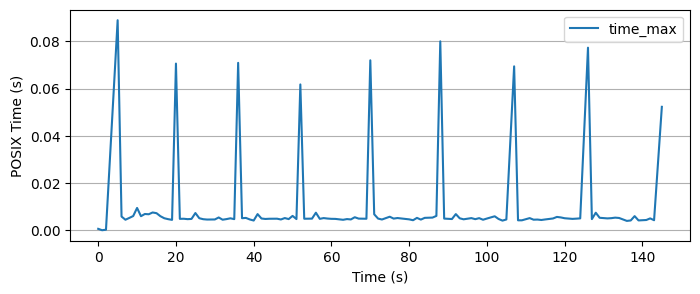

In [42]:
from matplotlib import ticker

ax = posix_time_range_view.plot.line(x="time_range", y="time_max", figsize=(8, 3))

ax.grid(axis="y", which="major")
ax.grid(axis="y", which="minor", alpha=0.3)

ax.set_xlabel("Time (s)")
ax.set_ylabel("POSIX Time (s)")

# ax.yaxis.set_major_locator(ticker.LinearLocator(5))

ax

<Axes: xlabel='Time (s)', ylabel='Average Transfer Size (bytes)'>

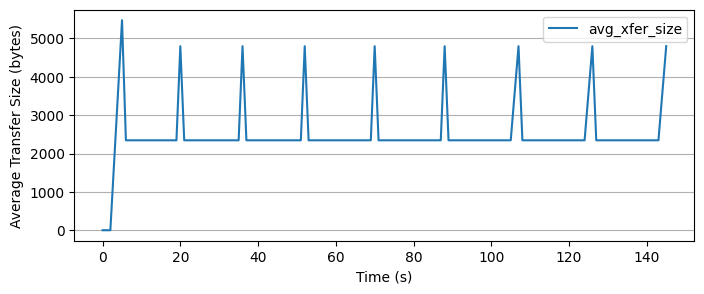

In [43]:
ax = posix_time_range_view.plot.line(x="time_range", y="avg_xfer_size", figsize=(8, 3))

ax.grid(axis="y", which="major")
ax.grid(axis="y", which="minor", alpha=0.3)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Average Transfer Size (bytes)")

ax